In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2020/1/13 16:28
# @Author  : Shark
# @Site    :
# @File    : tsts_trainer.py
# @Software: PyCharm

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# On CPU/GPU placement
config = tf.compat.v1.ConfigProto(allow_soft_placement=True, log_device_placement=True)
config.gpu_options.allow_growth = True
tf.compat.v1.Session(config=config)


2.0.0
Num GPUs Available:  1
Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:04:00.0, compute capability: 7.5



In [2]:
from kashgari.trainer.sampler_multi_task_trainer import SamplerMultiTaskTrainer
from kashgari.task import ReadabilityTask, NerTask, AlluSourceTask,AlluClassTask
from kashgari.processors import ClassificationProcessor, LabelingProcessor

poem_seq_len = 30
task_list = []



processor = LabelingProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
ner_task = NerTask(processor,
                   "./allusion_corpus",
                   poem_seq_len)
task_list.append(ner_task)

processor = ClassificationProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
allu_class_task = AlluClassTask(processor,
                                "./allusion_corpus",
                                poem_seq_len)
task_list.append(allu_class_task)

processor = ClassificationProcessor(vocab_path="../pretrained_embedding/bert/poem_chinese_L-12_H-768_A-12/")
allu_source_task = AlluSourceTask(processor,
                                  "./allusion_corpus",
                                  poem_seq_len,
                                  num_samples=50000)
task_list.append(allu_source_task)




Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: TITAN RTX, pci bus id: 0000:04:00.0, compute capability: 7.5



I:LOAD NER CORPUS:[ner_task.p: 65]:loaded 21596 samples from ./allusion_corpus/train.data. Samples:
x[0]: ['纶', '綍', '谋', '猷', '盛', ',', '丹', '青', '步', '武', '亲', '。']
y[0]: ['B-ALLU', 'I-ALLU', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [3]:
allu_def_seq_len = poem_seq_len
trainer = SamplerMultiTaskTrainer(task_list=task_list,
                                  batch_size=64,
                                  total_epochs=50,
                                  poem_seq_len=poem_seq_len,
                                  allu_def_seq_len=allu_def_seq_len)

final_res = trainer.train()


I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	107 training batches
I:BASE TASK:[base_task.:272]:	19 validation batches
I:BASE TASK:[base_task.:273]:	157 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:135]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:0:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-04-30-10_18_19/0/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, valid

Epoch 1/50
366/366 [==============================] - 258s 704ms/step - task_name: ALLU_CLASS  - loss: 2.1922 - accuracy: 0.1887 - val_loss: 2.7506 - val_accuracy: 0.2083


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
366/366 [==============================] - 109s 297ms/step - task_name: ALLU_CLASS  - loss: 2.3193 - accuracy: 0.2160 - val_loss: 2.8142 - val_accuracy: 0.2083


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
366/366 [==============================] - 115s 314ms/step - task_name: ALLU_CLASS  - loss: 1.7427 - accuracy: 0.2195 - val_loss: 2.7509 - val_accuracy: 0.2109


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
366/366 [==============================] - 108s 296ms/step - task_name: ALLU_CLASS  - loss: 2.2065 - accuracy: 0.2309 - val_loss: 2.7615 - val_accuracy: 0.2188


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
366/366 [==============================] - 120s 327ms/step - task_name: ALLU_CLASS  - loss: 2.3424 - accuracy: 0.2473 - val_loss: 2.7465 - val_accuracy: 0.2370


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
365/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.7012 - accuracy: 0.4997
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
366/366 [==============================] - 108s 296ms/step - task_name: ALLU_CLASS  - loss: 2.5533 - accuracy: 0.2573 - val_loss: 2.6659 - val_accuracy: 0.2604


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
365/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.6930 - accuracy: 0.4911
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
366/366 [==============================] - 104s 284ms/step - task_name: ALLU_CLASS  - loss: 2.2749 - accuracy: 0.2602 - val_loss: 2.6392 - val_accuracy: 0.2474


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
366/366 [==============================] - 107s 293ms/step - task_name: ALLU_CLASS  - loss: 2.8497 - accuracy: 0.2762 - val_loss: 2.7086 - val_accuracy: 0.2188


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
365/366 [============================>.] - ETA: 0s - task_name: ALLU_CLASS  - loss: 2.0367 - accuracy: 0.2728
Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
366/366 [==============================] - 104s 283ms/step - task_name: ALLU_CLASS  - loss: 2.8190 - accuracy: 0.2728 - val_loss: 2.7023 - val_accuracy: 0.2188


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
366/366 [==============================] - 7s 19ms/step - task_name: ALLU_CLASS  - loss: 2.3970 - accuracy: 0.2422 - val_loss: 2.6400 - val_accuracy: 0.2812


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
366/366 [==============================] - 6s 18ms/step - task_name: ALLU_CLASS  - loss: 2.3885 - accuracy: 0.2692 - val_loss: 2.6202 - val_accuracy: 0.2786


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
358/366 [============================>.] - ETA: 0s - task_name: ALLU_CLASS  - loss: 2.1180 - accuracy: 0.3022
Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.00034300000406801696.
366/366 [==============================] - 8s 21ms/step - task_name: ALLU_CLASS  - loss: 2.5811 - accuracy: 0.3022 - val_loss: 2.5506 - val_accuracy: 0.3021


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
366/366 [==============================] - 5s 13ms/step - task_name: ALLU_CLASS  - loss: 1.4948 - accuracy: 0.3147 - val_loss: 2.4619 - val_accuracy: 0.3073


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
366/366 [==============================] - 6s 18ms/step - task_name: ALLU_CLASS  - loss: 1.9829 - accuracy: 0.3534 - val_loss: 2.4543 - val_accuracy: 0.3281


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
366/366 [==============================] - 6s 18ms/step - task_name: ALLU_CLASS  - loss: 1.9716 - accuracy: 0.3745 - val_loss: 2.4334 - val_accuracy: 0.3203


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
344/366 [===========================>..] - ETA: 0s - task_name: ALLU_CLASS  - loss: 1.7744 - accuracy: 0.3953
Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
366/366 [==============================] - 6s 16ms/step - task_name: ALLU_CLASS  - loss: 1.6963 - accuracy: 0.3953 - val_loss: 2.4737 - val_accuracy: 0.3177


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
366/366 [==============================] - 6s 18ms/step - task_name: ALLU_CLASS  - loss: 1.9107 - accuracy: 0.4263 - val_loss: 2.4775 - val_accuracy: 0.3203


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
366/366 [==============================] - 7s 20ms/step - task_name: ALLU_CLASS  - loss: 2.1014 - accuracy: 0.4397 - val_loss: 2.4558 - val_accuracy: 0.3281


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
366/366 [==============================] - 5s 14ms/step - task_name: ALLU_CLASS  - loss: 1.2931 - accuracy: 0.4694 - val_loss: 2.4753 - val_accuracy: 0.3385


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
366/366 [==============================] - 4s 12ms/step - task_name: ALLU_CLASS  - loss: 1.1095 - accuracy: 0.4711 - val_loss: 2.4923 - val_accuracy: 0.3307


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 21/50
366/366 [==============================] - 5s 12ms/step - task_name: ALLU_CLASS  - loss: 1.0231 - accuracy: 0.4951 - val_loss: 2.4482 - val_accuracy: 0.3620


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 22/50
366/366 [==============================] - 6s 17ms/step - task_name: ALLU_CLASS  - loss: 1.5248 - accuracy: 0.4817 - val_loss: 2.4372 - val_accuracy: 0.3464


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 23/50
366/366 [==============================] - 4s 12ms/step - task_name: ALLU_CLASS  - loss: 0.9589 - accuracy: 0.5082 - val_loss: 2.5625 - val_accuracy: 0.3229


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 24/50
366/366 [==============================] - 6s 15ms/step - task_name: ALLU_CLASS  - loss: 1.3020 - accuracy: 0.5204 - val_loss: 2.5373 - val_accuracy: 0.3438


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 25/50
366/366 [==============================] - 8s 22ms/step - task_name: ALLU_CLASS  - loss: 1.9367 - accuracy: 0.5281 - val_loss: 2.4565 - val_accuracy: 0.3281


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 26/50
348/366 [===========================>..] - ETA: 0s - task_name: ALLU_CLASS  - loss: 1.3385 - accuracy: 0.5595
Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.00016806999628897755.
366/366 [==============================] - 6s 15ms/step - task_name: ALLU_CLASS  - loss: 1.1912 - accuracy: 0.5595 - val_loss: 2.5593 - val_accuracy: 0.3333


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 27/50
366/366 [==============================] - 5s 14ms/step - task_name: ALLU_CLASS  - loss: 1.0864 - accuracy: 0.5521 - val_loss: 2.6108 - val_accuracy: 0.3151


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 28/50
366/366 [==============================] - 6s 17ms/step - task_name: ALLU_CLASS  - loss: 1.2633 - accuracy: 0.5916 - val_loss: 2.6856 - val_accuracy: 0.3307


I:CUR_SPLIT:0:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.840527 precision: 0.517483, recall: 0.308476, f1: 0.386535

           precision    recall  f1-score   support

     ALLU     0.5175    0.3085    0.3865      4318

micro avg     0.5175    0.3085    0.3865      4318
macro avg     0.5175    0.3085    0.3865      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:君 不 见 太 皇 谅 阴 未 出 令 , 小 人 乘 时 偷 国 柄 。
y_pred:O O O O O O O O O O O O O O O O O O O
y_true:O O O O O B-ALLU I-ALLU O O O O O O O O O O O O
----------
x_seq:捷 书 皆 应 睿 谋 期 , 十 万 曾 无 一 [UNK] 遗 。
y_pred:O O O O O O O O O O O O B-ALLU I-ALLU I-ALLU O
y_true:O O O O O O O O O O O B-ALLU I-ALLU I-ALLU I-ALLU O
----------
x_seq:云 雨 由 来 随 六 龙 , 玉 泥 瑶 检 不 乾 封 。
y_pred:O O O O O B-ALLU I-ALLU O O O O O O O O O
y_true:O O O O O B-ALLU I-ALLU O O O O O O O O O
----------
x

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 0th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches


y_true:器用部
----------
END:**************************************************


I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	107 training batches
I:BASE TASK:[base_task.:272]:	19 validation batches
I:BASE TASK:[base_task.:273]:	157 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:135]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:1:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-04-30-10_18_19/1/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:ALLU_SOURCE's model_dir is ./model_ckpt/2020-04-30-10_18_19/1/ALLU_SOURCE-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_SOURCE]:trai

Epoch 1/50
366/366 [==============================] - 247s 674ms/step - task_name: ALLU_CLASS  - loss: 2.3283 - accuracy: 0.2135 - val_loss: 2.7435 - val_accuracy: 0.2552


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
366/366 [==============================] - 110s 302ms/step - task_name: ALLU_CLASS  - loss: 2.3770 - accuracy: 0.2392 - val_loss: 2.6944 - val_accuracy: 0.2578


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
366/366 [==============================] - 107s 293ms/step - task_name: ALLU_CLASS  - loss: 2.5101 - accuracy: 0.2485 - val_loss: 2.6251 - val_accuracy: 0.2552


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
365/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.6660 - accuracy: 0.6855
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
366/366 [==============================] - 103s 282ms/step - task_name: ALLU_CLASS  - loss: 2.8227 - accuracy: 0.2609 - val_loss: 2.5679 - val_accuracy: 0.2656


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
366/366 [==============================] - 104s 284ms/step - task_name: ALLU_CLASS  - loss: 1.6589 - accuracy: 0.2862 - val_loss: 2.5125 - val_accuracy: 0.2865


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
366/366 [==============================] - 103s 283ms/step - task_name: ALLU_CLASS  - loss: 1.9412 - accuracy: 0.2800 - val_loss: 2.4924 - val_accuracy: 0.2917


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
365/366 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.8284 - accuracy: 0.8306
Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
366/366 [==============================] - 104s 285ms/step - task_name: ALLU_CLASS  - loss: 1.5166 - accuracy: 0.3110 - val_loss: 2.4140 - val_accuracy: 0.2995


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
366/366 [==============================] - 101s 276ms/step - task_name: ALLU_CLASS  - loss: 2.5397 - accuracy: 0.3433 - val_loss: 3.0951 - val_accuracy: 0.2578


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
366/366 [==============================] - 46s 127ms/step - task_name: ALLU_CLASS  - loss: 1.6816 - accuracy: 0.2784 - val_loss: 2.4428 - val_accuracy: 0.3359


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
366/366 [==============================] - 38s 104ms/step - task_name: ALLU_CLASS  - loss: 1.3921 - accuracy: 0.3383 - val_loss: 2.2848 - val_accuracy: 0.3568


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
366/366 [==============================] - 42s 114ms/step - task_name: ALLU_CLASS  - loss: 1.8888 - accuracy: 0.3631 - val_loss: 2.2664 - val_accuracy: 0.3672


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
366/366 [==============================] - 43s 116ms/step - task_name: ALLU_CLASS  - loss: 1.6688 - accuracy: 0.4120 - val_loss: 2.2317 - val_accuracy: 0.3594


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
361/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3844 - accuracy: 0.8285
Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
366/366 [==============================] - 36s 99ms/step - task_name: ALLU_CLASS  - loss: 2.2883 - accuracy: 0.4267 - val_loss: 2.2947 - val_accuracy: 0.3385


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
366/366 [==============================] - 46s 124ms/step - task_name: ALLU_CLASS  - loss: 1.6826 - accuracy: 0.4728 - val_loss: 2.2831 - val_accuracy: 0.3385


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
366/366 [==============================] - 45s 122ms/step - task_name: ALLU_CLASS  - loss: 1.1287 - accuracy: 0.4792 - val_loss: 2.2298 - val_accuracy: 0.3724


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
366/366 [==============================] - 37s 101ms/step - task_name: ALLU_CLASS  - loss: 1.4783 - accuracy: 0.4927 - val_loss: 2.2361 - val_accuracy: 0.3516


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
366/366 [==============================] - 43s 117ms/step - task_name: ALLU_CLASS  - loss: 1.4263 - accuracy: 0.5050 - val_loss: 2.2689 - val_accuracy: 0.3411


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
365/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.2741 - accuracy: 0.8696
Epoch 00018: ReduceLROnPlateau reducing learning rate to 0.00034300000406801696.
366/366 [==============================] - 44s 121ms/step - task_name: ALLU_CLASS  - loss: 1.3653 - accuracy: 0.5246 - val_loss: 2.3186 - val_accuracy: 0.3542


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
366/366 [==============================] - 38s 104ms/step - task_name: ALLU_CLASS  - loss: 1.8279 - accuracy: 0.5621 - val_loss: 2.3682 - val_accuracy: 0.3385


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
366/366 [==============================] - 48s 131ms/step - task_name: ALLU_CLASS  - loss: 1.2617 - accuracy: 0.5658 - val_loss: 2.3537 - val_accuracy: 0.3359


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 21/50
366/366 [==============================] - 40s 108ms/step - task_name: ALLU_CLASS  - loss: 0.8931 - accuracy: 0.5742 - val_loss: 2.4496 - val_accuracy: 0.3490


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 22/50
359/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.1771 - accuracy: 0.8815
Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
366/366 [==============================] - 45s 124ms/step - task_name: ALLU_CLASS  - loss: 1.1722 - accuracy: 0.5793 - val_loss: 2.3960 - val_accuracy: 0.3568


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 23/50
366/366 [==============================] - 38s 105ms/step - task_name: ALLU_SOURCE - loss: 0.3223 - accuracy: 0.8739 - val_loss: 1.0155 - val_accuracy: 0.6793


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 24/50
366/366 [==============================] - 33s 91ms/step - task_name: ALLU_SOURCE - loss: 0.2634 - accuracy: 0.8819 - val_loss: 1.0596 - val_accuracy: 0.6645


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 25/50
359/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.2170 - accuracy: 0.8807
Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.00034300000406801696.
366/366 [==============================] - 36s 98ms/step - task_name: ALLU_SOURCE - loss: 0.2785 - accuracy: 0.8807 - val_loss: 1.0698 - val_accuracy: 0.6752


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 26/50
366/366 [==============================] - 39s 106ms/step - task_name: ALLU_SOURCE - loss: 0.2921 - accuracy: 0.8858 - val_loss: 1.1042 - val_accuracy: 0.6661


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 27/50
366/366 [==============================] - 37s 101ms/step - task_name: ALLU_SOURCE - loss: 0.2722 - accuracy: 0.8888 - val_loss: 1.0949 - val_accuracy: 0.6653


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 28/50
366/366 [==============================] - 34s 93ms/step - task_name: ALLU_SOURCE - loss: 0.2409 - accuracy: 0.8881 - val_loss: 1.1209 - val_accuracy: 0.6834


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 29/50
366/366 [==============================] - 30s 83ms/step - task_name: ALLU_SOURCE - loss: 0.2142 - accuracy: 0.8927 - val_loss: 1.0944 - val_accuracy: 0.6546


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 30/50
366/366 [==============================] - 34s 94ms/step - task_name: ALLU_SOURCE - loss: 0.2294 - accuracy: 0.9026 - val_loss: 1.1084 - val_accuracy: 0.6760


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 31/50
366/366 [==============================] - 36s 97ms/step - task_name: ALLU_SOURCE - loss: 0.2470 - accuracy: 0.8966 - val_loss: 1.1214 - val_accuracy: 0.6702


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 32/50
363/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.2283 - accuracy: 0.9004
Epoch 00032: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
366/366 [==============================] - 39s 106ms/step - task_name: ALLU_SOURCE - loss: 0.2644 - accuracy: 0.9004 - val_loss: 1.2227 - val_accuracy: 0.6579


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 33/50
366/366 [==============================] - 37s 100ms/step - task_name: ALLU_SOURCE - loss: 0.2386 - accuracy: 0.9044 - val_loss: 1.1889 - val_accuracy: 0.6612


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 34/50
366/366 [==============================] - 35s 95ms/step - task_name: ALLU_SOURCE - loss: 0.2211 - accuracy: 0.9112 - val_loss: 1.1974 - val_accuracy: 0.6562


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 35/50
362/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.2086 - accuracy: 0.9086
Epoch 00035: ReduceLROnPlateau reducing learning rate to 0.00016806999628897755.
366/366 [==============================] - 37s 101ms/step - task_name: ALLU_SOURCE - loss: 0.2284 - accuracy: 0.9086 - val_loss: 1.2042 - val_accuracy: 0.6735


I:CUR_SPLIT:1:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.833042 precision: 0.460845, recall: 0.343446, f1: 0.393577

           precision    recall  f1-score   support

     ALLU     0.4611    0.3434    0.3937      4318

micro avg     0.4608    0.3434    0.3936      4318
macro avg     0.4611    0.3434    0.3937      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:吹 箫 入 吴 市 , 击 筑 游 燕 肆 。
y_pred:O O O O O O O O O O O O
y_true:B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O
----------
x_seq:扈 从 由 来 是 方 朔 , 为 申 冤 气 在 长 平 。
y_pred:O O O O O B-ALLU I-ALLU O O O O O O O O O
y_true:O O O O O O O O O O O B-ALLU I-ALLU I-ALLU O O
----------
x_seq:国 讶 终 军 少 , 人 知 贾 谊 贤 。
y_pred:O O O O O O O O O O O O
y_true:O O O O O O O O B-ALLU I-ALLU O O
----------
x_seq:华 堂 良 宴 开 , 星 使 自 天 来 。
y_pred:O O O O O O B-ALLU I-ALLU O O O O
y_tru

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 1th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches


test_example:**************************************************
x_seq:黄 鸟 作 悲 诗 ， 至 今 声 不 亏 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:文明部
----------
x_seq:莫 笑 冯 唐 老 ， 还 来 谒 圣 君 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人事部
----------
x_seq:凿 壁 年 虽 异 ， 穿 杨 志 幸 同 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:器用部
----------
x_seq:敢 援 齐 相 狐 裘 例 ， 尚 可 随 身 十 五 年 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人事部
----------
x_seq:彭 尸 不 得 去 ， 罡 骑 无 行 色 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:九流部
----------
x_seq:五 柳 先 生 本 在 山 ， 偶 然 为 客 落 人 间 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部


I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	107 training batches
I:BASE TASK:[base_task.:272]:	19 validation batches
I:BASE TASK:[base_task.:273]:	157 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:135]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:2:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-04-30-10_18_19/2/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, validate on 2592 samples
I:BASE-MODEL:[base_model:133]:ALLU_SOURCE's model_dir is ./model_ckpt/2020-04-30-10_18_19/2/ALLU_SOURCE-NaiveDenseModel
I:BASE-MODEL:[base_model:232]:[ALLU_SOURCE]:trai

Epoch 1/50
366/366 [==============================] - 256s 700ms/step - task_name: ALLU_CLASS  - loss: 2.1281 - accuracy: 0.2194 - val_loss: 2.7206 - val_accuracy: 0.2057


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
366/366 [==============================] - 115s 313ms/step - task_name: ALLU_CLASS  - loss: 2.1987 - accuracy: 0.2729 - val_loss: 2.6001 - val_accuracy: 0.2422


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
366/366 [==============================] - 111s 303ms/step - task_name: ALLU_CLASS  - loss: 1.7998 - accuracy: 0.2923 - val_loss: 2.5451 - val_accuracy: 0.2630


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
366/366 [==============================] - 116s 318ms/step - task_name: ALLU_CLASS  - loss: 2.2339 - accuracy: 0.3504 - val_loss: 2.3451 - val_accuracy: 0.3359


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
365/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.7252 - accuracy: 0.5006
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
366/366 [==============================] - 114s 313ms/step - task_name: ALLU_CLASS  - loss: 2.0146 - accuracy: 0.3960 - val_loss: 2.2219 - val_accuracy: 0.3568


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
366/366 [==============================] - 103s 282ms/step - task_name: ALLU_CLASS  - loss: 1.7497 - accuracy: 0.4385 - val_loss: 2.2397 - val_accuracy: 0.3542


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
366/366 [==============================] - 103s 281ms/step - task_name: ALLU_CLASS  - loss: 1.7042 - accuracy: 0.4612 - val_loss: 2.2585 - val_accuracy: 0.3516


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
365/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.6891 - accuracy: 0.4986
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
366/366 [==============================] - 116s 317ms/step - task_name: ALLU_CLASS  - loss: 1.5226 - accuracy: 0.4838 - val_loss: 2.6039 - val_accuracy: 0.2760


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
366/366 [==============================] - 73s 199ms/step - task_name: ALLU_CLASS  - loss: 2.4257 - accuracy: 0.3836 - val_loss: 2.3728 - val_accuracy: 0.3099


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
366/366 [==============================] - 6s 18ms/step - task_name: ALLU_CLASS  - loss: 1.7096 - accuracy: 0.4111 - val_loss: 2.3049 - val_accuracy: 0.3620


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
366/366 [==============================] - 6s 16ms/step - task_name: ALLU_CLASS  - loss: 1.4177 - accuracy: 0.4591 - val_loss: 2.2512 - val_accuracy: 0.3307


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
366/366 [==============================] - 8s 22ms/step - task_name: ALLU_CLASS  - loss: 1.8143 - accuracy: 0.5074 - val_loss: 2.3522 - val_accuracy: 0.3750


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
366/366 [==============================] - 6s 17ms/step - task_name: ALLU_CLASS  - loss: 1.3596 - accuracy: 0.5248 - val_loss: 2.3878 - val_accuracy: 0.3906


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
366/366 [==============================] - 7s 18ms/step - task_name: ALLU_CLASS  - loss: 1.3703 - accuracy: 0.5718 - val_loss: 2.4113 - val_accuracy: 0.3307


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
366/366 [==============================] - 7s 19ms/step - task_name: ALLU_CLASS  - loss: 1.3532 - accuracy: 0.6027 - val_loss: 2.4384 - val_accuracy: 0.3464


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
366/366 [==============================] - 6s 15ms/step - task_name: ALLU_CLASS  - loss: 0.9534 - accuracy: 0.6496 - val_loss: 2.5576 - val_accuracy: 0.3333


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
366/366 [==============================] - 6s 16ms/step - task_name: ALLU_CLASS  - loss: 0.9331 - accuracy: 0.6830 - val_loss: 2.5941 - val_accuracy: 0.3516


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
366/366 [==============================] - 6s 17ms/step - task_name: ALLU_CLASS  - loss: 0.8952 - accuracy: 0.7177 - val_loss: 2.6389 - val_accuracy: 0.3542


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
366/366 [==============================] - 4s 12ms/step - task_name: ALLU_CLASS  - loss: 0.5655 - accuracy: 0.7305 - val_loss: 2.7658 - val_accuracy: 0.3411


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
366/366 [==============================] - 8s 23ms/step - task_name: ALLU_CLASS  - loss: 0.9662 - accuracy: 0.7746 - val_loss: 2.9001 - val_accuracy: 0.3281


I:CUR_SPLIT:2:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.829224 precision: 0.507121, recall: 0.231001, f1: 0.317415

           precision    recall  f1-score   support

     ALLU     0.5074    0.2310    0.3175      4316

micro avg     0.5071    0.2310    0.3174      4316
macro avg     0.5074    0.2310    0.3175      4316

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:自 笑 未 曾 同 逸 步 , 终 非 宗 炳 社 中 人 。
y_pred:O O O O O O O O O O O O O O O O
y_true:O O O O O O O O O O B-ALLU I-ALLU I-ALLU O O O
----------
x_seq:即 出 黄 沙 在 , 何 须 白 发 侵 。
y_pred:O O O O O O O O O O O O
y_true:O O B-ALLU I-ALLU O O O O O O O O
----------
x_seq:天 用 莫 如 龙 , 有 时 系 扶 桑 。
y_pred:B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O
y_true:B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O
----------
x_seq:有 路 在 壶 中 , 无 人 知 地 脉 。
y_pred:O O O B-ALLU O O O O O O

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 2th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


train_example:**************************************************
x_seq:眼 底 生 刍 奠 ， 身 前 泛 柏 舟 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人事部
----------
x_seq:收 得 千 金 不 龟 药 ， 短 裙 [UNK] 统 暮 江 寒 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:器用部
y_true:九流部
----------
x_seq:子 胥 既 弃 吴 江 上 ， 屈 原 终 投 湘 水 滨 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人事部
----------
x_seq:千 里 相 思 难 命 驾 ， 七 言 诗 里 寄 深 情 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:动物部
y_true:人事部
----------
x_seq:宁 戚 饭 牛 图 底 事 ， 陆 通 歌 凤 也 无 端 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:动物部
y_true:人事部
----------
x_seq:相 马 自 甘 齐 客 瘦 ， 食 鲑 谁 顾 庾 郎 薄 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人事部
----------
x_seq:可 怜 [UNK] 马 史 ，

I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	107 training batches
I:BASE TASK:[base_task.:272]:	19 validation batches
I:BASE TASK:[base_task.:273]:	157 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:135]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:3:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir is ./model_ckpt/2020-04-30-10_18_19/3/NER-Naive_CRF_Model
I:BASE-MODEL:[base_model:232]:[NER]:train info:Train on 14684 samples, valid

Epoch 1/50
366/366 [==============================] - 254s 694ms/step - task_name: ALLU_CLASS  - loss: 2.7036 - accuracy: 0.2251 - val_loss: 2.6545 - val_accuracy: 0.2604


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
366/366 [==============================] - 111s 303ms/step - task_name: ALLU_CLASS  - loss: 1.9230 - accuracy: 0.2481 - val_loss: 2.5831 - val_accuracy: 0.2734


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
366/366 [==============================] - 105s 287ms/step - task_name: ALLU_CLASS  - loss: 1.9043 - accuracy: 0.3005 - val_loss: 2.5073 - val_accuracy: 0.2786


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
366/366 [==============================] - 104s 283ms/step - task_name: ALLU_CLASS  - loss: 2.4936 - accuracy: 0.3543 - val_loss: 2.3840 - val_accuracy: 0.3151


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
366/366 [==============================] - 103s 281ms/step - task_name: ALLU_CLASS  - loss: 1.5326 - accuracy: 0.3828 - val_loss: 2.3757 - val_accuracy: 0.2891


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
366/366 [==============================] - 101s 277ms/step - task_name: ALLU_CLASS  - loss: 1.9833 - accuracy: 0.4200 - val_loss: 2.3912 - val_accuracy: 0.3385


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
366/366 [==============================] - 103s 282ms/step - task_name: ALLU_CLASS  - loss: 1.1791 - accuracy: 0.3914 - val_loss: 2.3226 - val_accuracy: 0.3438


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
366/366 [==============================] - 102s 279ms/step - task_name: ALLU_CLASS  - loss: 1.3269 - accuracy: 0.4375 - val_loss: 2.3542 - val_accuracy: 0.3385


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
366/366 [==============================] - 102s 279ms/step - task_name: ALLU_CLASS  - loss: 1.2447 - accuracy: 0.4776 - val_loss: 2.2947 - val_accuracy: 0.3438


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
365/366 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.1718 - accuracy: 0.8283
Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
366/366 [==============================] - 115s 313ms/step - task_name: ALLU_CLASS  - loss: 1.4560 - accuracy: 0.4911 - val_loss: 2.3679 - val_accuracy: 0.3047


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
366/366 [==============================] - 41s 112ms/step - task_name: ALLU_CLASS  - loss: 1.7705 - accuracy: 0.4663 - val_loss: 2.4218 - val_accuracy: 0.3438


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
366/366 [==============================] - 36s 99ms/step - task_name: ALLU_CLASS  - loss: 1.2363 - accuracy: 0.4974 - val_loss: 2.3558 - val_accuracy: 0.3411


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
363/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.4639 - accuracy: 0.8361
Epoch 00013: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
366/366 [==============================] - 43s 118ms/step - task_name: ALLU_CLASS  - loss: 1.4164 - accuracy: 0.5296 - val_loss: 2.3564 - val_accuracy: 0.3333


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
366/366 [==============================] - 52s 141ms/step - task_name: ALLU_CLASS  - loss: 2.1192 - accuracy: 0.4136 - val_loss: 2.9683 - val_accuracy: 0.2214


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
366/366 [==============================] - 32s 87ms/step - task_name: ALLU_SOURCE - loss: 0.3227 - accuracy: 0.8489 - val_loss: 0.7523 - val_accuracy: 0.6974


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
366/366 [==============================] - 34s 93ms/step - task_name: ALLU_SOURCE - loss: 0.3343 - accuracy: 0.8530 - val_loss: 0.8483 - val_accuracy: 0.6793


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
366/366 [==============================] - 38s 105ms/step - task_name: ALLU_SOURCE - loss: 0.3936 - accuracy: 0.8543 - val_loss: 0.8920 - val_accuracy: 0.6661


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
365/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.2545 - accuracy: 0.8604
Epoch 00018: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
366/366 [==============================] - 35s 95ms/step - task_name: ALLU_SOURCE - loss: 0.3308 - accuracy: 0.8604 - val_loss: 0.8892 - val_accuracy: 0.6908


I:CUR_SPLIT:3:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.831240 precision: 0.512132, recall: 0.273928, f1: 0.356938

           precision    recall  f1-score   support

     ALLU     0.5121    0.2739    0.3569      4315

micro avg     0.5121    0.2739    0.3569      4315
macro avg     0.5121    0.2739    0.3569      4315

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:有 鸟 哭 杨 震 , 无 儿 悲 邓 攸 。
y_pred:O O O O O O O O O O O O
y_true:O O O O O O O B-ALLU I-ALLU I-ALLU O O
----------
x_seq:国 人 咸 寡 和 , 遥 愧 洛 阳 才 。
y_pred:O O O O O O O O B-ALLU I-ALLU O O
y_true:O O O O O O O O B-ALLU I-ALLU I-ALLU O
----------
x_seq:东 山 宿 昔 意 , 北 征 非 我 心 。
y_pred:B-ALLU I-ALLU O O O O O O O O O O
y_true:B-ALLU I-ALLU I-ALLU I-ALLU I-ALLU O O O O O O O
----------
x_seq:笑 别 庐 山 远 , 何 烦 过 虎 溪 。
y_pred:O O O O O O O O O B-ALLU I-ALLU O
y_true:O O O O

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 3th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************


train_example:**************************************************
x_seq:少 年 天 子 重 边 功 ， 亲 到 凌 烟 画 阁 中 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:文明部
----------
x_seq:织 女 无 言 千 古 恨 ， 素 娥 有 意 十 分 春 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人物部
----------
x_seq:灰 死 韩 安 国 ， 罗 伤 翟 廷 尉 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:人物部
----------
x_seq:勖 尔 效 才 略 ， 功 成 衣 锦 还 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:器用部
----------
x_seq:吹 萧 来 唱 招 魂 曲 ， 拂 藓 先 看 堕 泪 碑 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:器用部
----------
x_seq:鸿 渐 升 羽 仪 ， 牛 刀 列 下 班 。 [UNK] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
y_pred:人事部
y_true:武备部
----

I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************
I:BASE TASK:[base_task.:270]:Task NER:
I:BASE TASK:[base_task.:271]:	230 training batches
I:BASE TASK:[base_task.:272]:	41 validation batches
I:BASE TASK:[base_task.:273]:	68 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_CLASS:
I:BASE TASK:[base_task.:271]:	29 training batches
I:BASE TASK:[base_task.:272]:	6 validation batches
I:BASE TASK:[base_task.:273]:	9 test batches
I:BASE TASK:[base_task.:270]:Task ALLU_SOURCE:
I:BASE TASK:[base_task.:271]:	107 training batches
I:BASE TASK:[base_task.:272]:	19 validation batches
I:BASE TASK:[base_task.:273]:	157 test batches
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:BERT EMBEDDING:[bert_embed:105]:seq_len:30
I:AHMTL MODEL:[AHMTL.py:135]:Multi-Task Learning Model has been instantiated.
I:CUR_SPLIT:4:[sampler_mu: 92]:Set up ready. Begining training/validation.
I:BASE-MODEL:[base_model:133]:NER's model_dir

Epoch 1/50
366/366 [==============================] - 226s 617ms/step - task_name: ALLU_CLASS  - loss: 3.2506 - accuracy: 0.2232 - val_loss: 2.7524 - val_accuracy: 0.2396


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 2/50
366/366 [==============================] - 112s 306ms/step - task_name: ALLU_CLASS  - loss: 2.0516 - accuracy: 0.2992 - val_loss: 2.7381 - val_accuracy: 0.2240


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 3/50
366/366 [==============================] - 106s 289ms/step - task_name: ALLU_CLASS  - loss: 2.1395 - accuracy: 0.3286 - val_loss: 2.5232 - val_accuracy: 0.2969


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 4/50
366/366 [==============================] - 101s 277ms/step - task_name: ALLU_CLASS  - loss: 1.7647 - accuracy: 0.3843 - val_loss: 2.4891 - val_accuracy: 0.3177


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 5/50
365/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.6146 - accuracy: 0.6345
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
366/366 [==============================] - 102s 278ms/step - task_name: ALLU_CLASS  - loss: 1.7062 - accuracy: 0.4191 - val_loss: 2.4915 - val_accuracy: 0.3151


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 6/50
366/366 [==============================] - 100s 273ms/step - task_name: ALLU_CLASS  - loss: 1.7424 - accuracy: 0.4281 - val_loss: 2.4757 - val_accuracy: 0.3594


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 7/50
366/366 [==============================] - 101s 277ms/step - task_name: ALLU_CLASS  - loss: 1.5256 - accuracy: 0.4721 - val_loss: 2.4121 - val_accuracy: 0.3594


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 8/50
365/366 [============================>.] - ETA: 0s - task_name:     NER     - loss: 2.6286 - accuracy: 0.8309
Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
366/366 [==============================] - 101s 277ms/step - task_name: ALLU_CLASS  - loss: 1.1595 - accuracy: 0.4794 - val_loss: 2.7027 - val_accuracy: 0.2656


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 9/50
366/366 [==============================] - 41s 111ms/step - task_name: ALLU_CLASS  - loss: 1.5337 - accuracy: 0.3652 - val_loss: 2.3642 - val_accuracy: 0.3177


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 10/50
366/366 [==============================] - 41s 113ms/step - task_name: ALLU_CLASS  - loss: 1.9309 - accuracy: 0.4439 - val_loss: 2.4235 - val_accuracy: 0.3385


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 11/50
365/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.6001 - accuracy: 0.7296
Epoch 00011: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
366/366 [==============================] - 44s 121ms/step - task_name: ALLU_CLASS  - loss: 1.5781 - accuracy: 0.4763 - val_loss: 2.4055 - val_accuracy: 0.3464


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 12/50
366/366 [==============================] - 40s 110ms/step - task_name: ALLU_CLASS  - loss: 1.0975 - accuracy: 0.4881 - val_loss: 2.3979 - val_accuracy: 0.3464


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 13/50
366/366 [==============================] - 43s 116ms/step - task_name: ALLU_CLASS  - loss: 1.6199 - accuracy: 0.5128 - val_loss: 2.4006 - val_accuracy: 0.3724


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 14/50
366/366 [==============================] - 42s 115ms/step - task_name: ALLU_CLASS  - loss: 1.5647 - accuracy: 0.5265 - val_loss: 2.4977 - val_accuracy: 0.3542


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 15/50
366/366 [==============================] - 38s 103ms/step - task_name: ALLU_CLASS  - loss: 1.0472 - accuracy: 0.5496 - val_loss: 2.4575 - val_accuracy: 0.3698


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 16/50
366/366 [==============================] - 41s 112ms/step - task_name: ALLU_CLASS  - loss: 1.0178 - accuracy: 0.5632 - val_loss: 2.5245 - val_accuracy: 0.3516


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 17/50
366/366 [==============================] - 44s 120ms/step - task_name: ALLU_CLASS  - loss: 1.2425 - accuracy: 0.5885 - val_loss: 2.4690 - val_accuracy: 0.3828


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 18/50
359/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.4551 - accuracy: 0.8032
Epoch 00018: ReduceLROnPlateau reducing learning rate to 0.00034300000406801696.
366/366 [==============================] - 42s 114ms/step - task_name: ALLU_CLASS  - loss: 1.2440 - accuracy: 0.5754 - val_loss: 2.5027 - val_accuracy: 0.3490


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 19/50
364/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.5255 - accuracy: 0.8177
Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.0004900000232737511.
366/366 [==============================] - 41s 111ms/step - task_name: ALLU_CLASS  - loss: 1.0670 - accuracy: 0.6267 - val_loss: 2.5631 - val_accuracy: 0.3776


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 20/50
366/366 [==============================] - 39s 108ms/step - task_name: ALLU_CLASS  - loss: 1.2776 - accuracy: 0.6576 - val_loss: 2.5784 - val_accuracy: 0.3542


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 21/50
366/366 [==============================] - 42s 114ms/step - task_name: ALLU_CLASS  - loss: 1.4275 - accuracy: 0.6828 - val_loss: 2.6935 - val_accuracy: 0.3490


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 22/50
366/366 [==============================] - 41s 112ms/step - task_name: ALLU_CLASS  - loss: 0.7406 - accuracy: 0.7077 - val_loss: 2.7568 - val_accuracy: 0.3333


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 23/50
362/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.4092 - accuracy: 0.8302
Epoch 00023: ReduceLROnPlateau reducing learning rate to 0.00024009999469853935.
366/366 [==============================] - 39s 107ms/step - task_name: ALLU_CLASS  - loss: 0.5686 - accuracy: 0.7253 - val_loss: 2.7002 - val_accuracy: 0.3542


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 24/50
366/366 [==============================] - 39s 107ms/step - task_name: ALLU_CLASS  - loss: 0.7915 - accuracy: 0.7405 - val_loss: 2.7672 - val_accuracy: 0.3464


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 25/50
366/366 [==============================] - 37s 101ms/step - task_name: ALLU_SOURCE - loss: 0.3891 - accuracy: 0.8400 - val_loss: 0.7549 - val_accuracy: 0.6801


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 26/50
366/366 [==============================] - 30s 82ms/step - task_name: ALLU_SOURCE - loss: 0.2901 - accuracy: 0.8515 - val_loss: 0.7627 - val_accuracy: 0.6891


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 27/50
366/366 [==============================] - 34s 94ms/step - task_name: ALLU_SOURCE - loss: 0.3338 - accuracy: 0.8463 - val_loss: 0.7884 - val_accuracy: 0.6817


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 28/50
366/366 [==============================] - 39s 106ms/step - task_name: ALLU_SOURCE - loss: 0.3825 - accuracy: 0.8502 - val_loss: 0.7754 - val_accuracy: 0.6834


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 29/50
363/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3907 - accuracy: 0.8538
Epoch 00029: ReduceLROnPlateau reducing learning rate to 0.00016806999628897755.
366/366 [==============================] - 35s 95ms/step - task_name: ALLU_SOURCE - loss: 0.3334 - accuracy: 0.8538 - val_loss: 0.7897 - val_accuracy: 0.6842


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 30/50
366/366 [==============================] - 36s 97ms/step - task_name: ALLU_SOURCE - loss: 0.3291 - accuracy: 0.8589 - val_loss: 0.8049 - val_accuracy: 0.6850


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 31/50
366/366 [==============================] - 38s 103ms/step - task_name: ALLU_SOURCE - loss: 0.3429 - accuracy: 0.8628 - val_loss: 0.8077 - val_accuracy: 0.6900


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 32/50
366/366 [==============================] - 32s 87ms/step - task_name: ALLU_SOURCE - loss: 0.2749 - accuracy: 0.8717 - val_loss: 0.8253 - val_accuracy: 0.6891


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 33/50
366/366 [==============================] - 37s 101ms/step - task_name: ALLU_SOURCE - loss: 0.3173 - accuracy: 0.8704 - val_loss: 0.8499 - val_accuracy: 0.6801


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 34/50
366/366 [==============================] - 36s 97ms/step - task_name: ALLU_SOURCE - loss: 0.3079 - accuracy: 0.8683 - val_loss: 0.8382 - val_accuracy: 0.6826


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 35/50
365/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3288 - accuracy: 0.8725
Epoch 00035: ReduceLROnPlateau reducing learning rate to 0.00011764899536501615.
366/366 [==============================] - 34s 92ms/step - task_name: ALLU_SOURCE - loss: 0.2877 - accuracy: 0.8727 - val_loss: 0.8676 - val_accuracy: 0.6826


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 36/50
366/366 [==============================] - 40s 108ms/step - task_name: ALLU_SOURCE - loss: 0.3335 - accuracy: 0.8770 - val_loss: 0.8624 - val_accuracy: 0.6859


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 37/50
366/366 [==============================] - 36s 97ms/step - task_name: ALLU_SOURCE - loss: 0.2965 - accuracy: 0.8747 - val_loss: 0.8654 - val_accuracy: 0.6801


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------


Epoch 38/50
365/366 [============================>.] - ETA: 0s - task_name: ALLU_SOURCE - loss: 0.3743 - accuracy: 0.8812
Epoch 00038: ReduceLROnPlateau reducing learning rate to 8.235429777414538e-05.
366/366 [==============================] - 34s 94ms/step - task_name: ALLU_SOURCE - loss: 0.2751 - accuracy: 0.8807 - val_loss: 0.8758 - val_accuracy: 0.6875


I:CUR_SPLIT:4:[sampler_mu:139]:----------------------------------------------------------------------------------------------------



----------------------------------NER LABEL METRICS -----------------------------------

epoch:labeling EPOCH accuracy 0.824986 precision: 0.591935, recall: 0.084993, f1: 0.148643

           precision    recall  f1-score   support

     ALLU     0.5948    0.0850    0.1487      4318

micro avg     0.5919    0.0850    0.1486      4318
macro avg     0.5948    0.0850    0.1487      4318

----------------------------------NER END ----------------------------------
train_example:**************************************************
x_seq:坐 觉 千 闾 静 , 闲 随 五 马 游 。
y_pred:O O O O O O O O B-ALLU I-ALLU O O
y_true:O O O O O O O O B-ALLU I-ALLU O O
----------
x_seq:圣 朝 岩 穴 选 , 应 待 鹤 书 征 。
y_pred:O O O O O O O O B-ALLU I-ALLU O O
y_true:O O O O O O O O B-ALLU I-ALLU I-ALLU O
----------
x_seq:休 问 梁 园 旧 宾 客 , 茂 陵 秋 雨 病 相 如 。
y_pred:O O O O O O O O O O O O O O O O
y_true:O O O O O O O O O O O O B-ALLU I-ALLU O O
----------
x_seq:海 畔 将 军 柳 , 天 边 处 士 星 。
y_pred:O O O O O O O O O O O O
y_true:O O O O O O O

I:SAMPLE_TRAINER:[sampler_mu: 43]:cur_split_idx 4th END
I:SAMPLE_TRAINER:[sampler_mu: 44]:****************************************************************************************************
I:SAMPLE_TRAINER:[sampler_mu: 45]:****************************************************************************************************


In [4]:
from kashgari.utils import compute_mean_metrics
from kashgari.utils import plot_final_res

NER	[0.83180387 0.5179032  0.24836886 0.32062171]
ALLU_SOURCE	0.37690468253968257
ALLU_CLASS	[0.23837722 0.19736908 0.45516607 0.22996214]


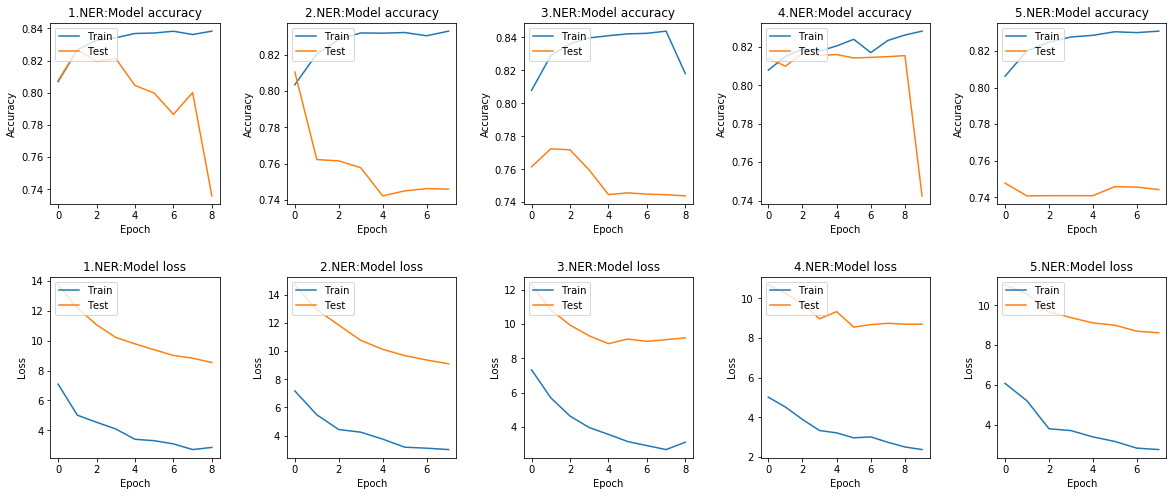

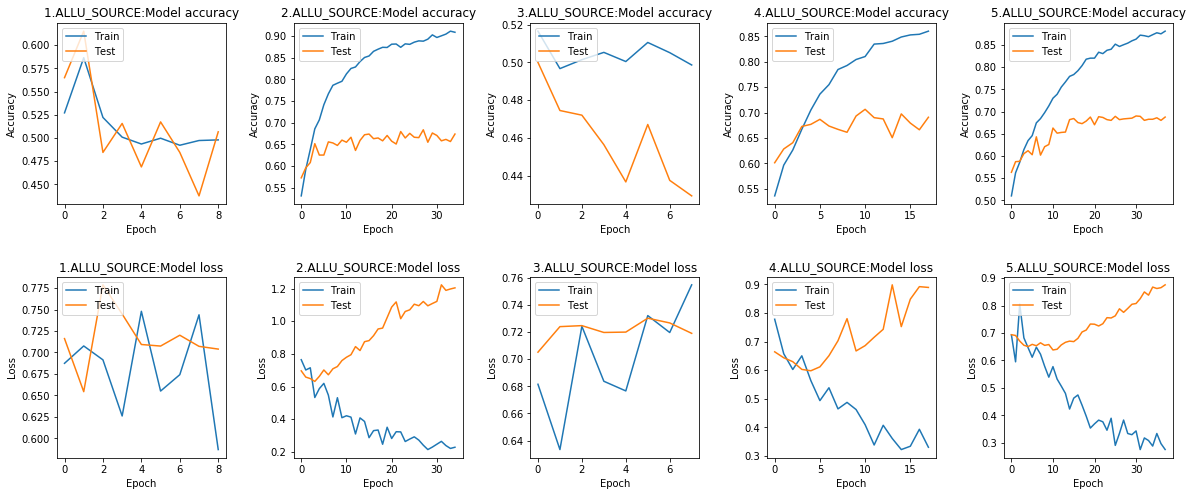

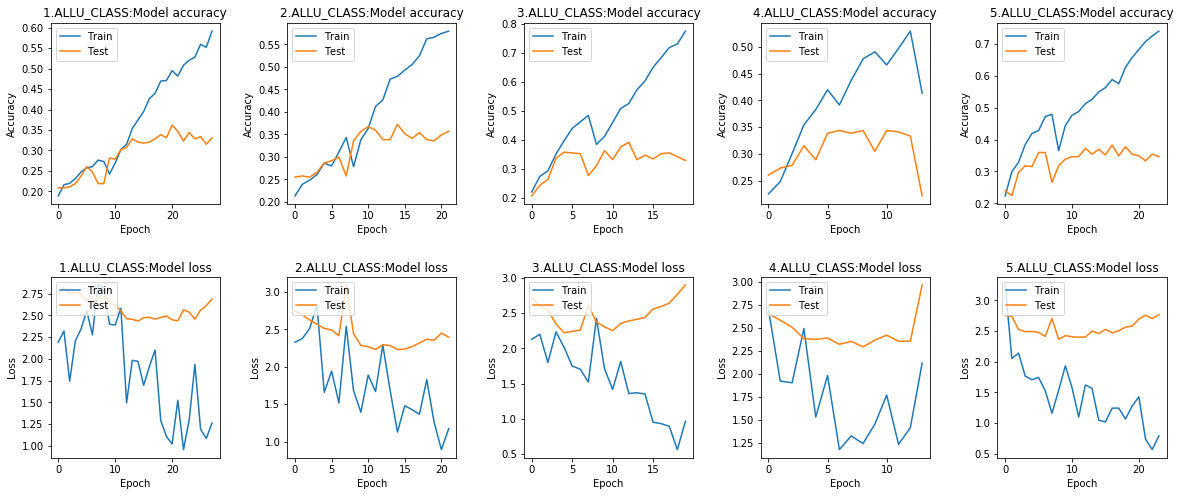

In [5]:
compute_mean_metrics(final_res)
plot_final_res(final_res)

NER	[0.83180387 0.5179032  0.24836886 0.32062171]
ALLU_SOURCE	0.37690468253968257
ALLU_CLASS	[0.23837722 0.19736908 0.45516607 0.22996214]


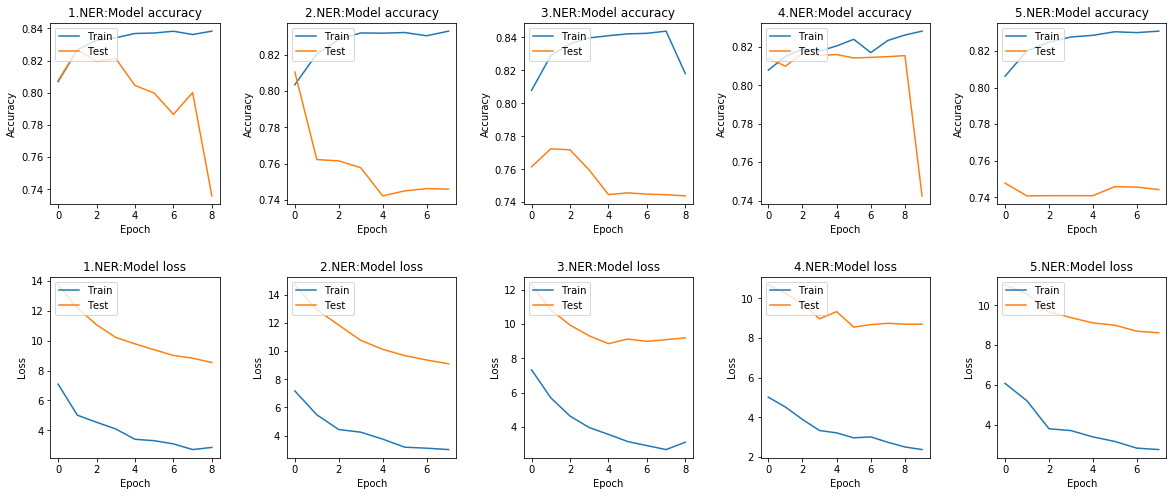

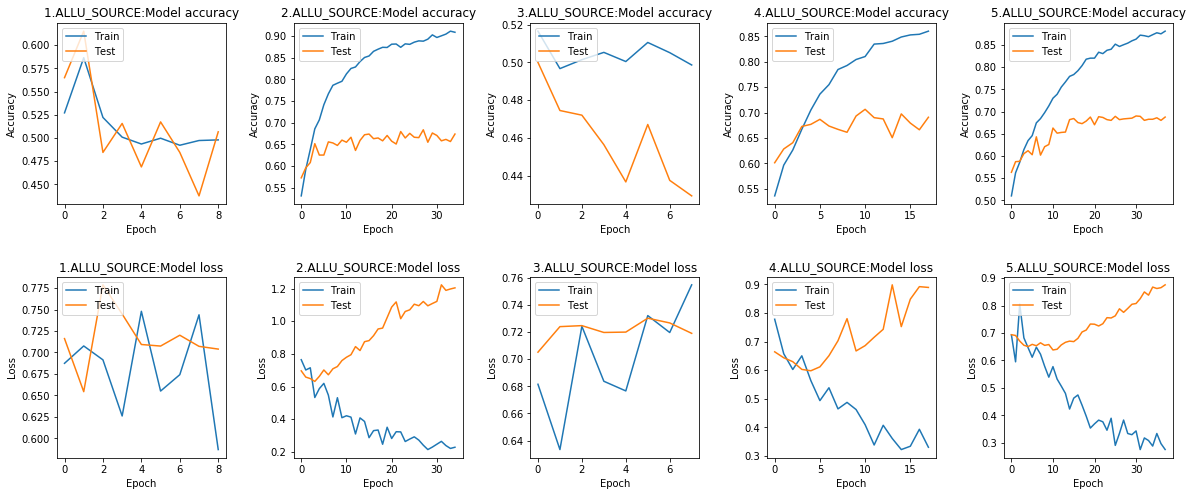

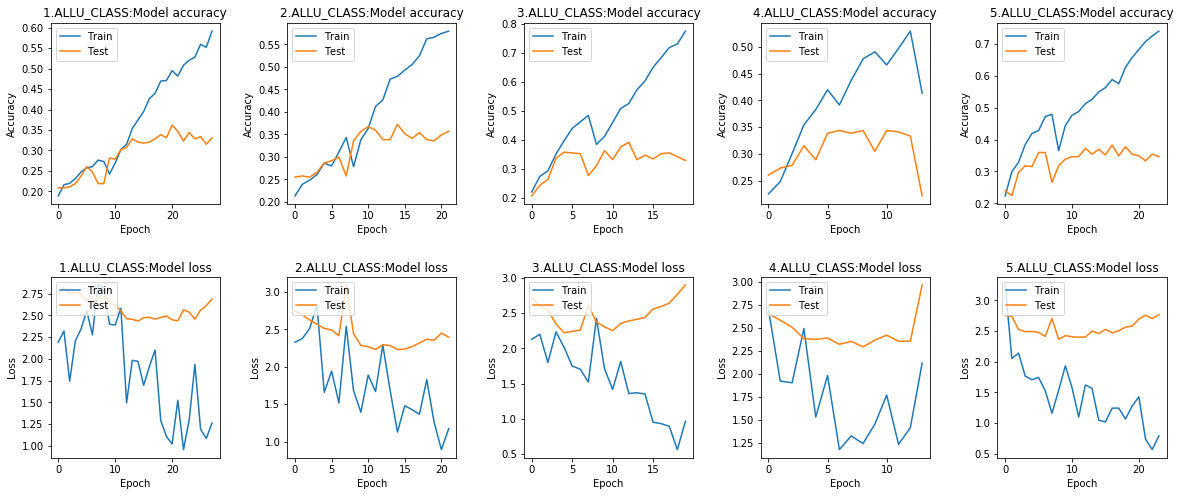

In [6]:
compute_mean_metrics(final_res)
plot_final_res(final_res)

In [7]:
1.allusion source ： num_samples=100000
NER	[0.82062129 0.30122219 0.21536006 0.24681671]
ALLU_SOURCE	0.4299342063492063
ALLU_CLASS	[0.22753336 0.22782296 0.29417793 0.17215509]

SyntaxError: invalid syntax (<ipython-input-7-67b3eff54b29>, line 1)